In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go

import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#ML Models/Regression
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score, classification_report, ConfusionMatrixDisplay, roc_auc_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv
/kaggle/input/heart-disease-classification-dataset/Heart Attack.csv


In [2]:
df1 = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df2 = pd.read_csv("/kaggle/input/heart-disease-classification-dataset/Heart Attack.csv")
df2

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [3]:
#check for missing values
missing_values = df2.isnull().sum()
missing_values

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [4]:
#remove duplicate values
df2 = df2.drop_duplicates()
df2

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [5]:
df2['heart_attack'] = df2['class'].map({'negative': 0, 'positive': 1})
df2 = df2.drop("class",axis=1)
df2

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,heart_attack
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


In [6]:
#preprocessing the data
#checking for noise in gender column
df2['gender'].unique()

array([1, 0])

In [7]:
df2.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'heart_attack'],
      dtype='object')

**Data Visualization**

/tmp/ipykernel_18/3330581753.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 1.02, 'Pair Plot of Features with Class Labels')

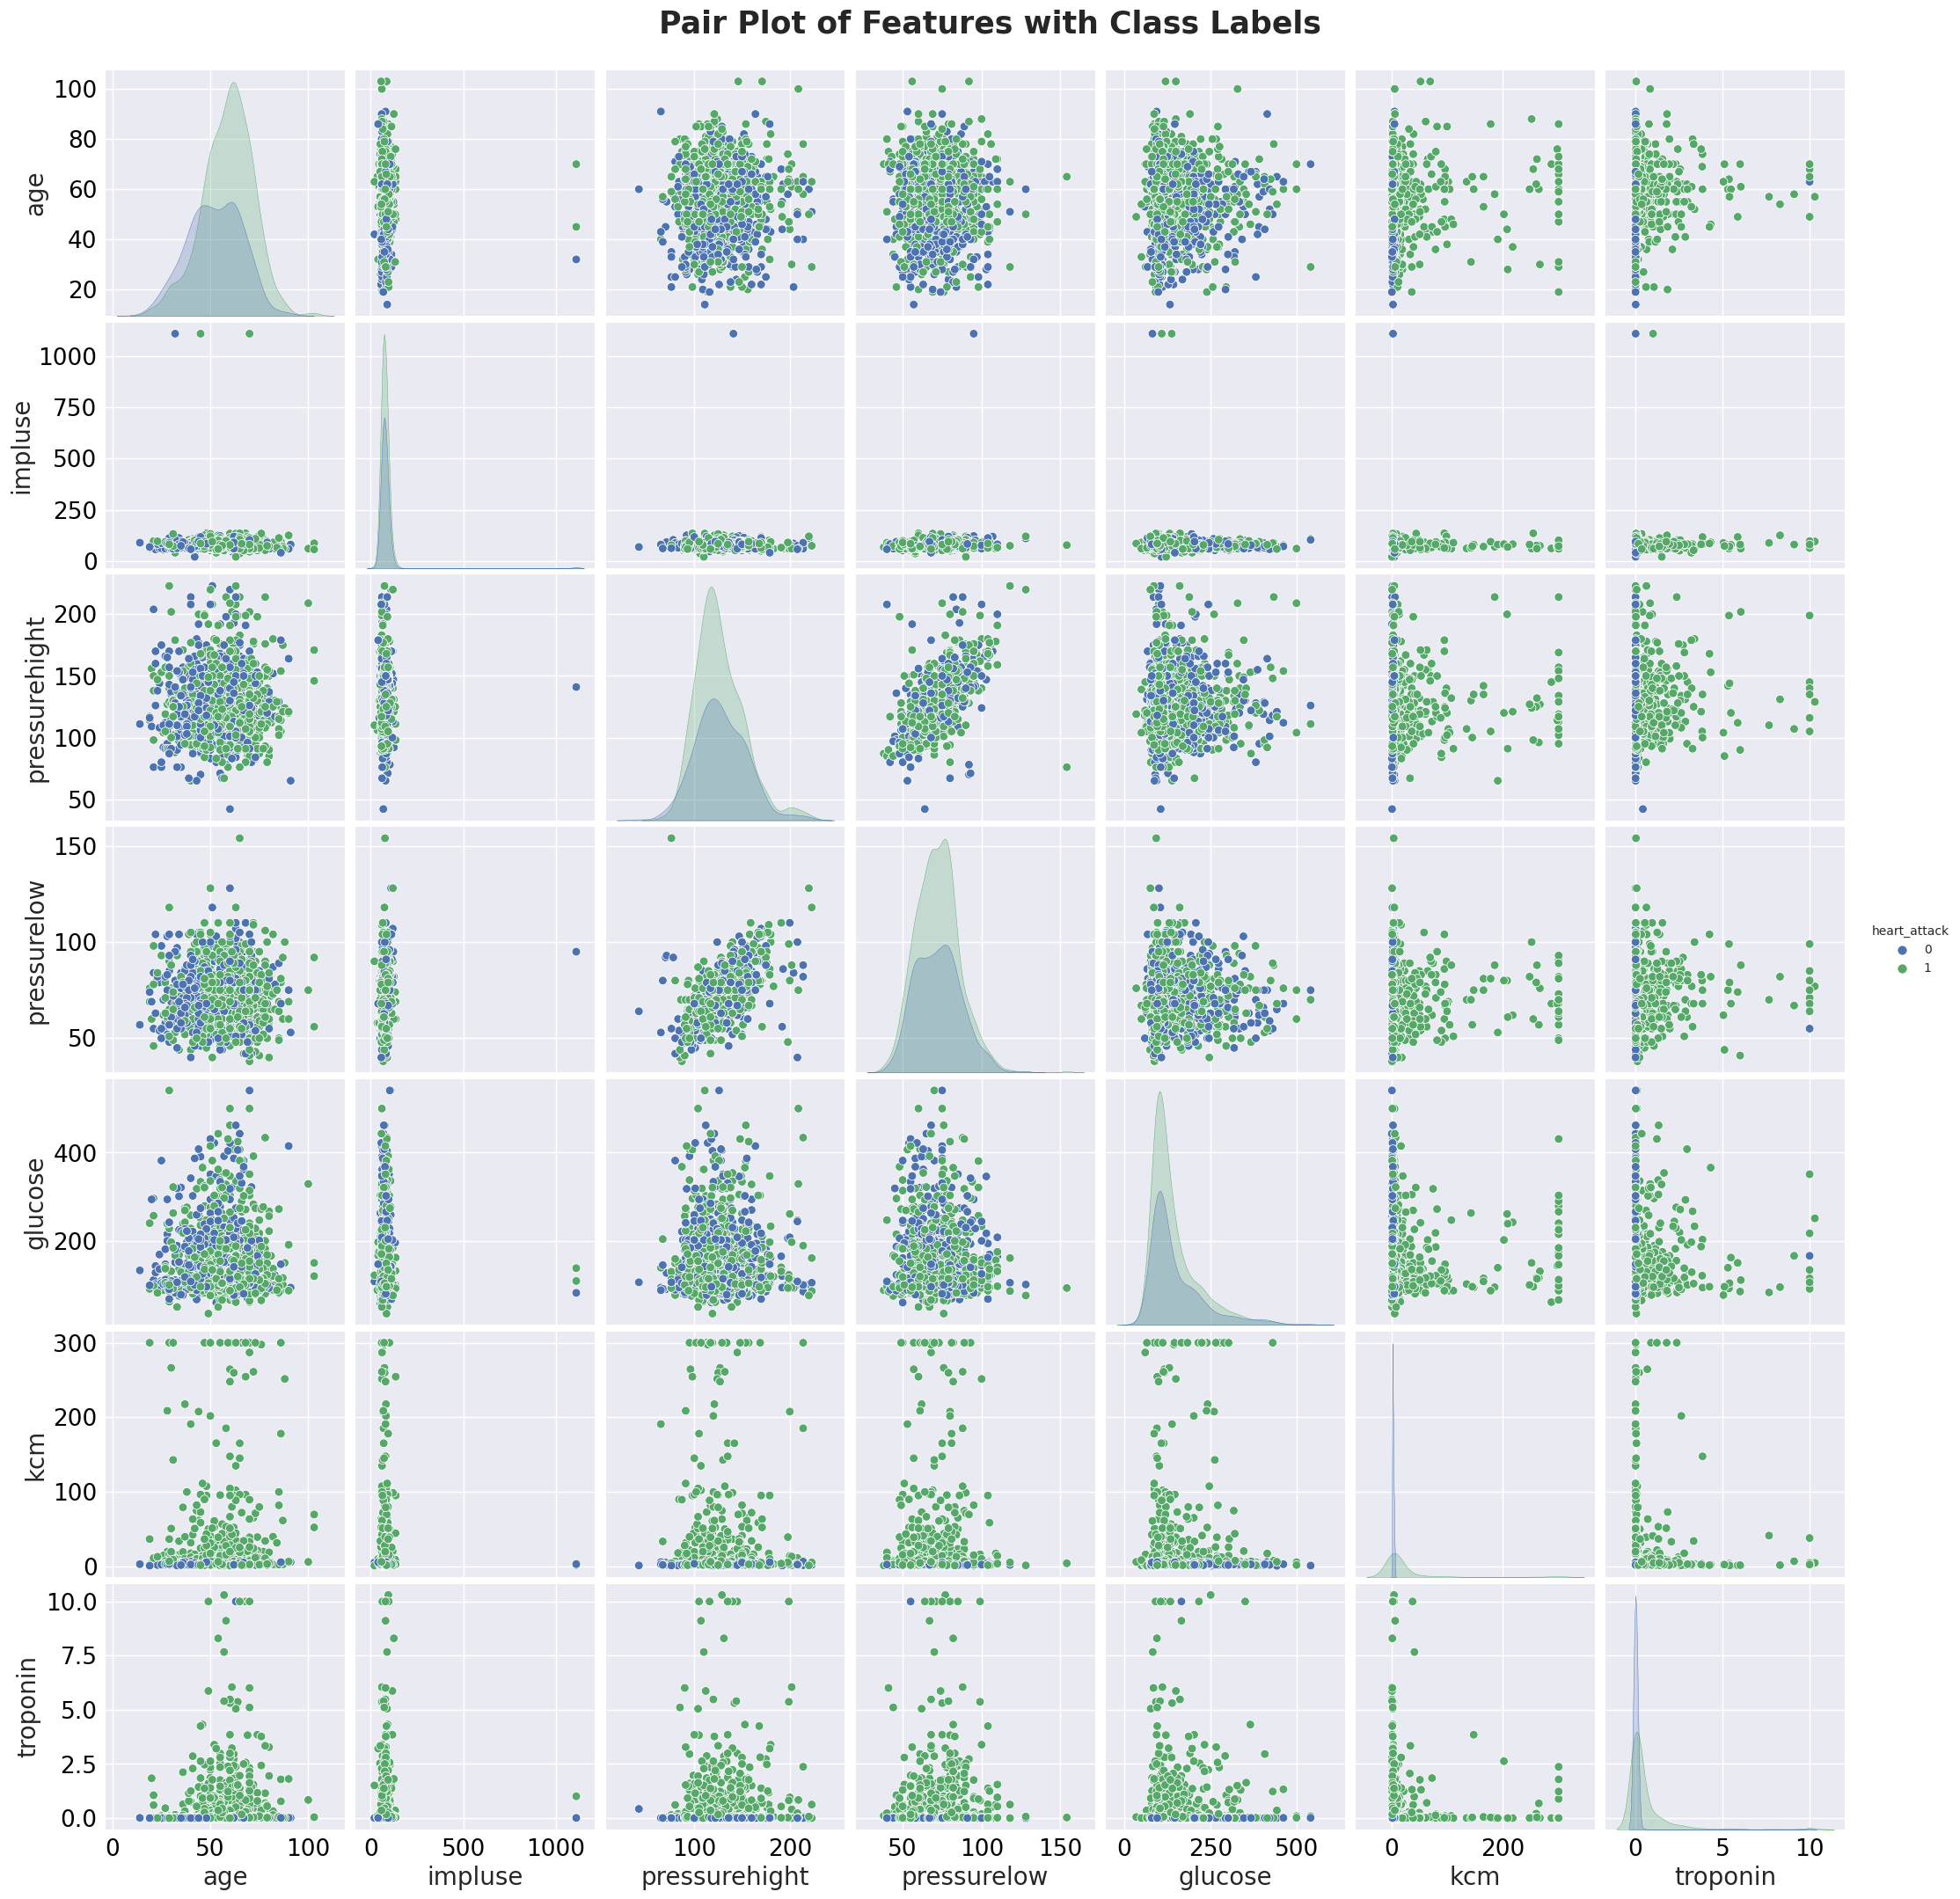

In [8]:
import warnings # To suppress some warnings
 
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

plt.style.use("seaborn")

# Create pairplot
pairplot = sns.pairplot(df2.drop(columns=['gender']), hue='heart_attack', height=3, aspect=1)

# Add grids
for ax in pairplot.axes.flatten():
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=19, labelcolor='black', width=1.5)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)

# Add title
plt.suptitle('Pair Plot of Features with Class Labels', fontsize=25, fontweight='bold', y=1.02)

# Show plot

Some noise observed on the impulse feature, will need to remove

In [9]:
# removing noises
index = df2.loc[df2['impluse'] > 500].index
df2.drop(index=index, inplace=True)
df2



,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,heart_attack
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


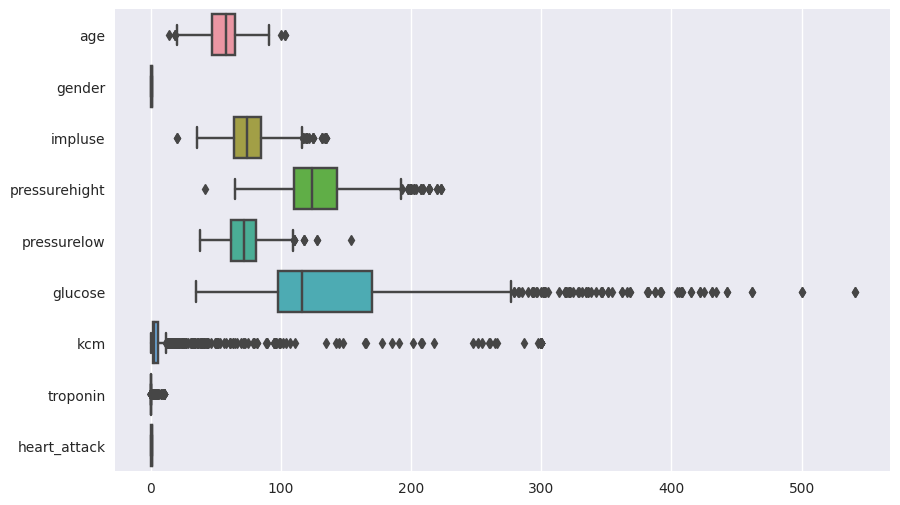

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df2, orient="h");

# We also want to see which variables have positive correlation with cases that experienced heart attack, so we need to generate a heat map for the various features.

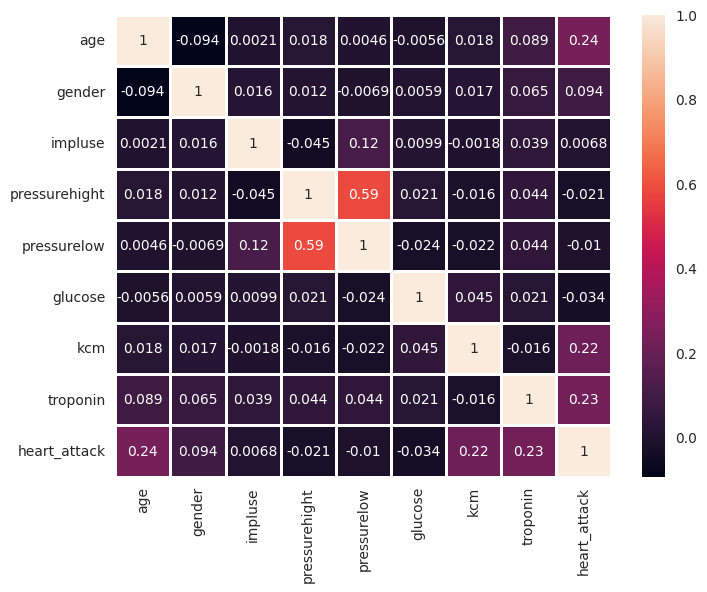

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df2.corr(), annot=True, linewidths=0.75);

We observe that there is a positive correlation between age, gender, impulse, kcm, and troponin and heart_attack.

In [12]:
X = df2.drop("heart_attack", axis =1)
y = df2["heart_attack"]

# create X and y test/train data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [13]:
#scaling the data 
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [14]:
from tqdm import tqdm
scores = {}
for i in tqdm([RandomForestClassifier,  DecisionTreeClassifier,
               GradientBoostingClassifier, AdaBoostClassifier, KNeighborsClassifier]):
    model = i()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    scores[i.__name__] = recall
    
scores

100%|██████████| 5/5 [00:00<00:00,  6.51it/s]


{'RandomForestClassifier': 0.9685534591194969,
 'DecisionTreeClassifier': 0.9685534591194969,
 'GradientBoostingClassifier': 0.9748427672955975,
 'AdaBoostClassifier': 0.9685534591194969,
 'KNeighborsClassifier': 0.7295597484276729}

In [15]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
gb = GradientBoostingClassifier()
ab = AdaBoostClassifier()
kn = KNeighborsClassifier()

In [16]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [19]:
ab.fit(X_train, y_train)

AdaBoostClassifier()

In [20]:
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
pred_rf = rf.predict(X_test)
pred_dt = dt.predict(X_test)
pred_gb = gb.predict(X_test)
pred_ab = ab.predict(X_test)
pred_kn = kn.predict(X_test)

In [22]:
def model_met(preds, model):
   # print(f"Best Parameters: {model.best_params_}\n")
    print(f"Classification report:\n{classification_report(y_test, preds)}\n")
   # feat_importance = model.best_estimator_.feature_importances_
    #feat_importance = pd.DataFrame(index=X.columns, data=feat_importacne, columns=["Importance"])
    #print(f"Feature importance:\n{feat_importance.sort_values(ascending=False, by='Importance')}\n")
    print("Confiusion Matrix:")
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    
    

**Metrics for Random Forest**

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       105
           1       0.99      0.97      0.98       159

    accuracy                           0.97       264
   macro avg       0.97      0.97      0.97       264
weighted avg       0.97      0.97      0.97       264


Confiusion Matrix:


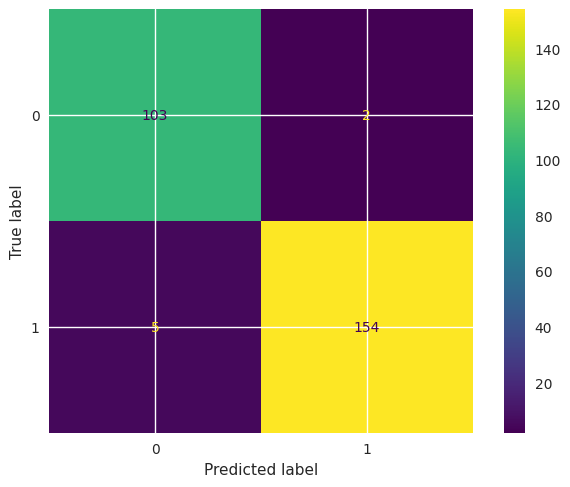

In [23]:
model_met(pred_rf, rf)

**Feature Importance of Random Forest:**

<function matplotlib.pyplot.show(close=None, block=None)>

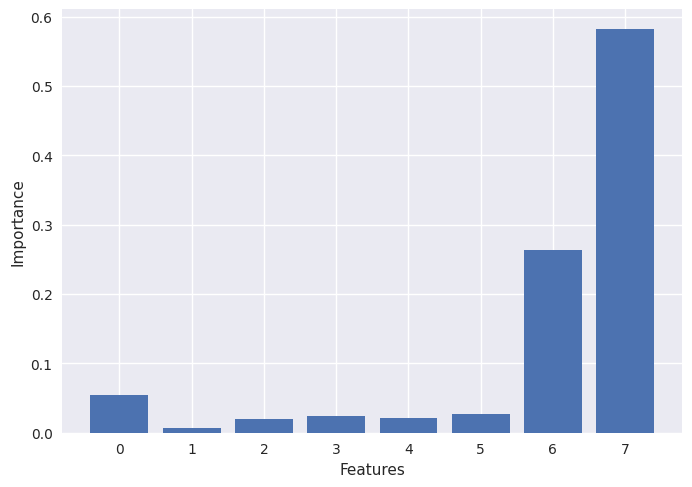

In [24]:
plt.bar(range(X.shape[1]), rf.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show

**Metrics for Decision Trees:**

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       105
           1       0.99      0.97      0.98       159

    accuracy                           0.97       264
   macro avg       0.97      0.97      0.97       264
weighted avg       0.97      0.97      0.97       264


Confiusion Matrix:


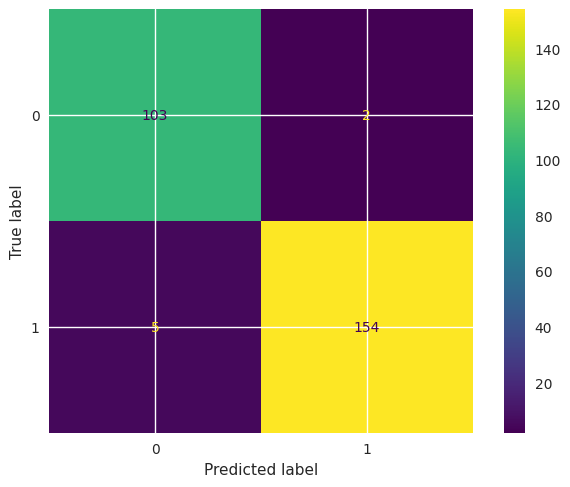

In [25]:
model_met(pred_dt, dt)

**Feature Importance of Decision Trees:**

<function matplotlib.pyplot.show(close=None, block=None)>

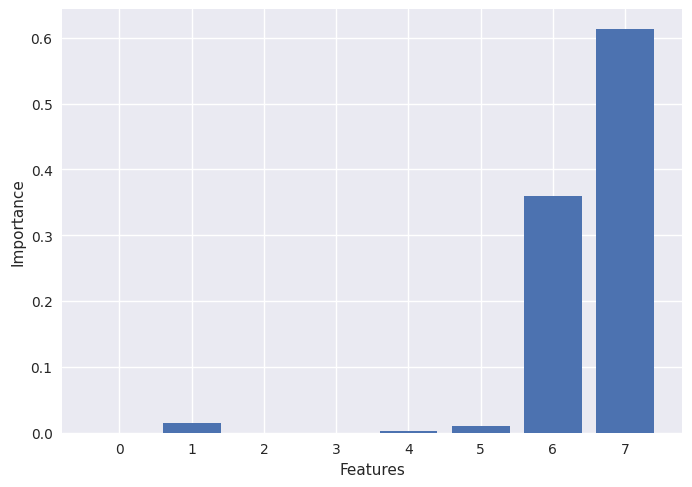

In [26]:
plt.bar(range(X.shape[1]), dt.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show

**Metrics for Gradient Boost**

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       105
           1       0.99      0.97      0.98       159

    accuracy                           0.98       264
   macro avg       0.97      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264


Confiusion Matrix:


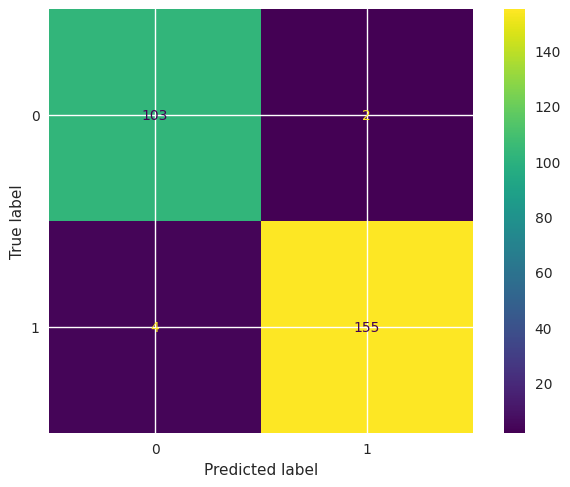

In [27]:
model_met(pred_gb, gb)


**Feature Importance for Gradient Boost:**

<function matplotlib.pyplot.show(close=None, block=None)>

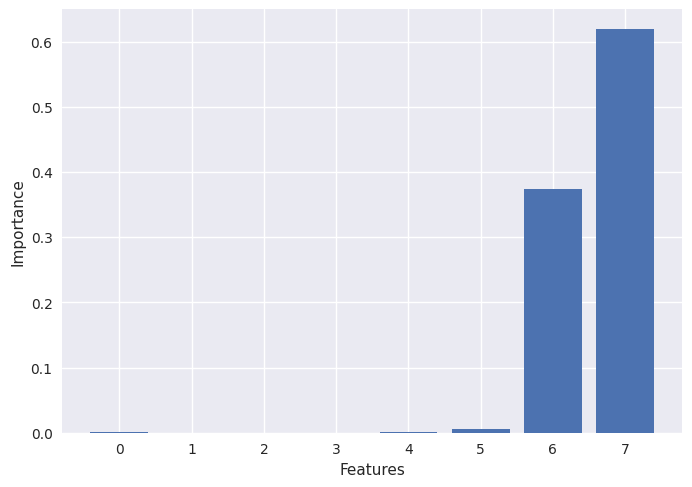

In [28]:
plt.bar(range(X.shape[1]), gb.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show

**Metrics for AdaBoost:**

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       105
           1       0.99      0.97      0.98       159

    accuracy                           0.97       264
   macro avg       0.97      0.97      0.97       264
weighted avg       0.97      0.97      0.97       264


Confiusion Matrix:


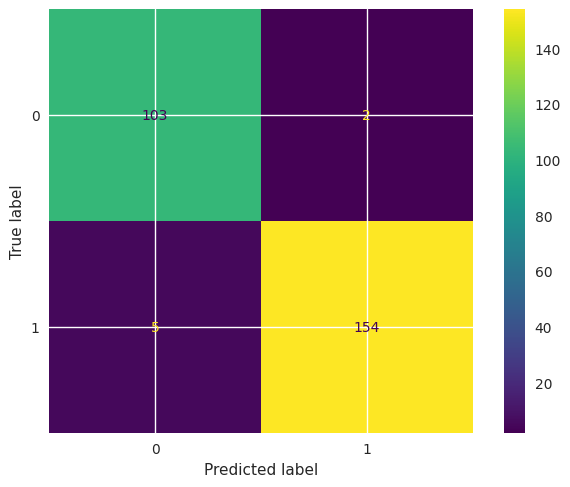

In [29]:
model_met(pred_ab, ab)

**Feature Importance for AdaBoost:**

<function matplotlib.pyplot.show(close=None, block=None)>

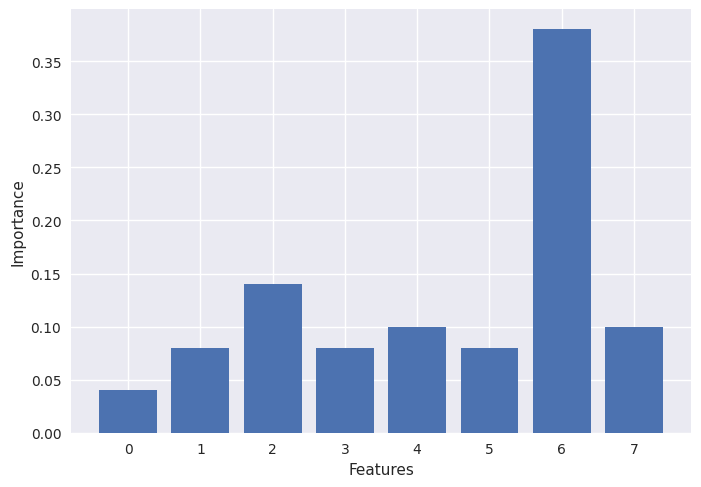

In [30]:
plt.bar(range(X.shape[1]), ab.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show

**Metrics for K-Neighbors:**

Classification report:
              precision    recall  f1-score   support

           0       0.59      0.60      0.60       105
           1       0.73      0.73      0.73       159

    accuracy                           0.68       264
   macro avg       0.66      0.66      0.66       264
weighted avg       0.68      0.68      0.68       264


Confiusion Matrix:


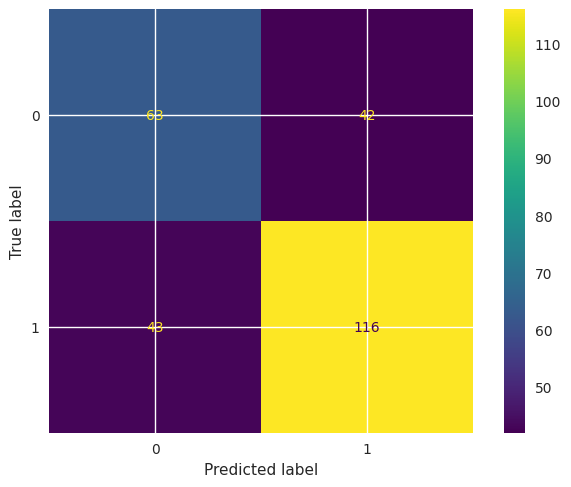

In [31]:
model_met(pred_kn, kn)

**Feature Importance for K-Neighbors:**

In [32]:

#K-neighbors does not appear to have a feature_importances attribute

#plt.bar(range(X.shape[1]), kn.feature_importances_)
#plt.xlabel('Features')
#plt.ylabel('Importance')
#plt.show

AUC Scores

In [33]:
from tqdm import tqdm
scores_list = []
for i in tqdm([RandomForestClassifier,  DecisionTreeClassifier,
               GradientBoostingClassifier, AdaBoostClassifier, KNeighborsClassifier]):
    model = i()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    true_score = y.loc[y_test.index]
        
    roc_auc = roc_auc_score(true_score, y_pred)
        
    scores[i.__name__] = roc_auc
scores_list.append(scores)

100%|██████████| 5/5 [00:00<00:00,  6.28it/s]


In [34]:
averages = {}
for i in [RandomForestClassifier,  DecisionTreeClassifier,
               GradientBoostingClassifier, AdaBoostClassifier, KNeighborsClassifier]:
    sum = 0
    for scores in scores_list:
        sum += scores[i.__name__]
    average = sum / len(scores_list)
    averages[i.__name__] = average
averages
    

{'RandomForestClassifier': 0.9778975741239893,
 'DecisionTreeClassifier': 0.9747529200359388,
 'GradientBoostingClassifier': 0.9778975741239893,
 'AdaBoostClassifier': 0.9747529200359388,
 'KNeighborsClassifier': 0.6647798742138363}

In [35]:
#params_gb = {'n_estimators': [50, 100, 150],
            #'learning_rate': [0.01, 0.05, 0.1],
            #'max_depth':[3,4,5],
            #'min_samples_split': [2,5,10],
            #'min_samples_leaf':[1,2,4]}

In [36]:
#grid_gb = GridSearchCV(gb, params_gb)

In [37]:
#grid_gb.fit(X_train, y_train)

In [38]:
#params_rf = {"n_estimators" : [50, 72, 100, 128],
            #"max_features" : ['sqrt'],
            #"min_samples_split" : [2, 5, 10],
            #"min_samples_leaf" : [1, 4, 9]}
#grid_rf = GridSearchCV(rf, params_rf)
#grid_rf.fit(X_train, y_train)